Angela Pizzuto (git: acpizzuto, email: angela_pizzuto@brown.edu)

In [460]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy import integrate  # MUST BE RUNNING PHYS 1600 kernel
from scipy import signal

**Problem 1**

$$C_{v}=$$ 124.9841749235983
0.0115


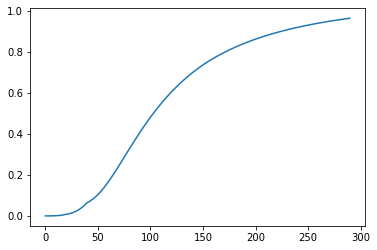

In [484]:
# some dummy parameters
kg = 3.07e24 #number of atoms in a kg of gold
kb = 1.38e-23 #boltzmann
T = 293 #room temp, Kelvin
thetad = 170 #gold's debye temp.
avo = 6.02e23

#function to define midpoints
def simpson_eval(f, a, b, fa, fb):
    mid = (a+b)/2
    fmid = f(mid)
    simp = ((b-a)/6)*(fa+fb+4*fmid)
    return(mid, fmid, simp)

#function to evaluate each half of the integral, add together, and check if it's within preset error tolerance
def adapt_simp(f, a, b, mid, fa, fb, fmid, eps, total):
    la, lm, low = simpson_eval(f, a, mid, fa, fmid)
    rm, rb, high = simpson_eval(f, mid, b, fmid, fb)
    err = high+low - total
    if err<= eps:
        return(high+low+err)
    else:
        return adapt_simp(f, a, mid, la, fa, fmid, lm, eps, low)+ adapt_simp(f, mid, b, rm, fmid, fb, rb, eps, high)

#function to return final integral
def intresult(f, a, b, eps):
    fa = f(a)
    fb = f(b)
    mid, fmid, total = simpson_eval(f, a, b, fa, fb)
    return adapt_simp(f, a, b, mid, fa, fb, fmid, eps, total)

#defining the debye integrand
def debye(x):
    return (x**4)*(np.exp(x))/((np.exp(x)-1.0)**2)

#and integrating using the adaptive simpson's method, with some chosen parameters.
final = intresult(debye, 1e-5, thetad/T, 1e-8)
print('$$C_{v}=$$', final*9.0*kg*kb*((T/thetad)**3.0))

#yields a Cv of 125 J/(kg*K) - internet says it's 129 so that's pretty good!

vol = 1e-6 # unit conversion, cubic mm to cubic m

thetad_pb = 105
thetad_al = 428
thetad_di = 2230

p_pb = 11.5*(1e-3)*(1e6)
p_al = 2.7*(1e-3)*(1e6)
p_di = 3.51*(1e-3)*(1e6)


m_pb = p_pb*vol
m_al = p_al*vol
m_di = p_di*vol

print(m_pb)
n= 90;

tempx = [0]*(n+1)
di = [0]*(n+1)
al = [0]*(n+1)
pb = [0]*(n+1)

for i in range(2,n):
    tempx[i] = i*(T/n)
    di[i] = intresult(debye, 1e-5,thetad_di/tempx[i], 1e-9)
    al[i] = intresult(debye, 1e-5,thetad_al/tempx[i], 1e-9)
    pb[i] = intresult(debye, 1e-5,thetad_pb/tempx[i], 1e-9)
    

finaldi = list(np.array(di)*9.0*m_di*avo*kb*((np.array(tempx)/thetad)**3.0))
finalal = list(np.array(al)*9.0*m_al*avo*kb*((np.array(tempx)/thetad)**3.0))
finalpb = list(np.array(pb)*9.0*m_pb*avo*kb*((np.array(tempx)/thetad)**3.0))


#plt.plot(tempx[0:len(tempx)-1], finaldi[0:len(tempx)-1])
#plt.plot(tempx[0:len(tempx)-1], finalal[0:len(tempx)-1])
plt.plot(tempx[0:len(tempx)-1], finalal[0:len(tempx)-1])

**Problem 2a**

From the definition of capacitance:
$$ V_{C} = \frac{Q}{C} $$
$$ \frac{dV_{C}}{dt} = \frac{1}{C} \frac{dQ}{dt} = \frac{1}{C}I(t) $$\
Using $$I(t) =\frac{V_{R}}{R} $$
We get:
$$ \frac{dV_{C}}{dt} = \frac{V_{R}}{RC} $$ \
The input voltage is the voltage across the resistor + the voltage across the capacitor:
$$ V_{in} = V_{R} + V_{C} $$\
Finally:
$$ \frac{dV_{out}}{dt} = \frac{V_{in}-V_{out}}{RC} $$

**Problem 2b**

In [ ]:
#writing the RK4 solver

def RK4(f, t0, x0, tf, n):
    #some initializing and basic math
    dt = (tf-t0)/n
    tn = t0;
    xn = x0;
    tlist = [0]*(n+1)
    xlist = [0]*(n+1)
    
    #implementing RK4 method...
    for i in range(1,n+1):
        k1 = f(tn, xn)
        k2 = f(tn +(dt/2), xn+dt*(k1/2)) 
        k3 = f(tn +(dt/2), xn+dt*(k2/2))
        k4 = f(tn+dt, xn+dt*k3)
    
        tn = t0 + i*dt
        xn = xn + (1/6)*dt*(k1 +2*k2+2*k3+k4)
    
        tlist[i] = tn;
        xlist[i] = xn;
    
    return tlist, xlist #gives me final input and output lists

plt.figure(figsize = (15,5))

ttest = np.linspace(0,10,100)  #just testing to make sure I can make a square wave with the signal package
Vin = signal.square(2*np.pi*ttest)
plt.plot(ttest, Vin, label = '$V_{in}$')
#it works! plotting it along with the Vouts as a reference

#the suggested RC values and associated plot labels
RC = [.01, .1, 1]
rcleg = ['RC = .01', 'RC = .1', 'RC = 1']

#do the RK4 solver for all the RC values, with a square wave input
for j in range(0,len(RC)):
    def Vout(t, x):
        return (signal.square(2*np.pi*t)-x)/(RC[j])
    t,y = RK4(Vout, 0, 0, 10, 1000)
    plt.plot(t,y, label=rcleg[j])  #plot them
    legend=plt.legend(loc = 'center right', shadow=True)
    
plt.xlabel('t [s]')
plt.ylabel('V')



**Problem 2c**

When the input voltage is high (+1), it begins charging up the capacitor. When the input becomes negative, it discharges the capacitor and then begins to switch the signs of charge on the plates. The higher the time constant, the more time it takes for the capacitor to charge/discharge- since the equation governing that goes like $e^{-t/RC}$; it is clear from this plot that a very low RC constant (RC = .01) fully charges and reverse-charges the capacitor almost instantly (see behavior relative to input wave, blue), while a longer RC constant (RC=1) only reaches about $\pm$ .33V before it begins to reverse direction.

**Problem 3**

In [ ]:
#3a
#using the RK4 function from problem 2, and adding an extra function so I can handle coupled differential equations

def RK4_2(f, g, t0, x0, y0, tf, n):
  
    tlist = [0]*(n+1)
    xlist = [0]*(n+1)
    ylist = [0]*(n+1)
    
    dt = (tf-t0)/n
    tn = t0;
    xn = x0;
    yn = y0;
    
    tlist[1] = t0
    xlist[1] = x0
    ylist[1] = y0
    
    for i in range(1,n):
        
        k1 = f(tn, xn, yn)
        l1 = g(tn, xn, yn)
        
        k2 = f(tn +(dt/2), xn+dt*(k1/2), yn+dt*(l1/2)) 
        l2 = g(tn +(dt/2), xn+dt*(k1/2), yn+dt*(l1/2))
        
        k3 = f(tn +(dt/2), xn+dt*(k2/2), yn+dt*(l2/2))
        l3 = g(tn +(dt/2), xn+dt*(k2/2), yn+dt*(l2/2))
        
        k4 = f(tn+dt, xn+dt*k3, yn+dt*l3)
        l4 = g(tn+dt, xn+dt*k3, yn+dt*l3)
        
        tn = t0 + i*dt
        xn = xn + (1/6)*dt*(k1 +2*k2+2*k3+k4)
        yn = yn + (1/6)*dt*(l1 +2*l2+2*l3+l4)\
        
        tlist[i+1] = tn
        xlist[i+1] = xn
        ylist[i+1] = yn
        
    return tlist, xlist, ylist

#some choices for the decay times
tau_a = 100;
tau_b = 200;
Na0 = 30
Nb0 = 5

#defining the functions that represent the 2 differential equations
def Na_func(t,x,y):
    return -x/tau_a

def Nb_func(t,x,y):
    return x/tau_a - y/tau_b

#using the RK4 solver and getting t, Na, and Nb.
t, Na, Nb = RK4_2(Na_func, Nb_func, 0, Na0, Nb0, 1000, 10000)

**3b**

The analytical solution for $N_{a}$ is attained pretty easily from the first equation:
$$N_{a} = N_{0}^{a}e^{(\frac{-t}{\tau_{a}})}$$

For the second equation, we need to actually take a sophisticated approach.

$$ \frac{d}{dt}\begin{pmatrix} N_{a} \\ N_{b} \end{pmatrix} =\begin{pmatrix} \frac{-1}{\tau_{a}} & 0 \\ \frac{1}{\tau_{a}} & \frac{-1}{\tau_{b}}\end{pmatrix} \begin{pmatrix} N_{a} \\ N_{b} \end{pmatrix}$$ 

The eigenvalues of the coefficient matrix are $$\lambda_{1} = \frac{-1}{\tau_{a}}$$ and $$\lambda_{2} = \frac{-1}{\tau_b}$$

Then, we solve for the associated eigenvectors. They are:

$$ \vec{v_{1}} = \begin{pmatrix} 1 \\ \frac{\tau_b}{\tau_{a}-\tau{b}} \end{pmatrix}$$ and $$\vec{v_{2}} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

Yielding a final general solution:

$$ \begin{pmatrix} N_{a} \\ N_{b} \end{pmatrix} = \vec{v_{1}}e^{\frac{-1}{\tau_{a}}} + \vec{v_{2}}e^{\frac{-1}{\tau_{b}}}$$ 


In [ ]:
#writing up the analytical solutions
tarr = np.array(t)
Na_an = Na0*np.exp(-tarr/tau_a)
Nb_an = (Na0*tau_b/(tau_a-tau_b))*np.exp(-tarr/tau_a)+(Nb0 -(Na0*tau_b/(tau_a-tau_b)))*np.exp(-tarr/tau_b)

#plotting analytical (black) on top of RK4 (yellow, blue), for a random set of decay times
plt.figure(figsize = (8,6))
plt.plot(tarr, Na_an, linewidth = 5, color = 'yellow', label='$N_{a}$, analytical')
plt.plot(tarr, Nb_an, linewidth = 5, color='cyan', label = '$N_{b}$, analytical')
plt.plot(t[2:len(t)],Na[2:len(Na)],label = '$N_{a}$, RK4', color='black', linestyle='dashed')
plt.plot(t[2:len(t)],Nb[2:len(Nb)],label = '$N_{b}$, RK4', color = 'black', linestyle = 'dotted')
legend = plt.legend(loc = 'upper right', shadow = True)

#in conclusion, my RK4 function is kinda killin it

**Problem 4**

In [ ]:
#I'm going to break up x and y components, use original RK4 to solve for each direction's velocity independently

#basic parameters and unit conversions to SI
Cd = .3
A = np.pi*(7.4e-2)**2
v0  = 150*(1e3)/3600 #unit conversion on given v0 = 150 km/h
theta = np.pi*32/180 #32 degrees in radians
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)
mball = .15
g= 9.8 #m/s^2

#defining functions for the x and y velocitys' differential equations
def vx(t,x):
    return -.5*A*Cd*(x**2)

def vy(t,y):
    return -mball*g+.5*Cd*A*(y**2)

#some things for the solver- number of points, tolerance 
n=1000
tf = 80


#use RK4 to solve for velocities
t, vxlist = RK4(vx, 0, vx0, tf, n)
t, vylist = RK4(vy, 0, vy0, tf, n)

#plotting velocities vs time
plt.figure(1)
plt.plot(t[2:len(t)], vxlist[2:len(vxlist)], color='blue', label = '$v_{x}$')
plt.plot(t[2:len(t)], vylist[2:len(vylist)],color= 'red', label = '$v_{y}$')
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
legend = plt.legend(loc = 'upper right', shadow=True)

#using built-in cumulative trapezoidal method to integrate at every point from 0 to get position lists
px= sci.integrate.cumtrapz(vxlist)
py =sci.integrate.cumtrapz(vylist)

#x and y pos vs time plots
plt.figure(2)
plt.plot(t[1:len(t)], px, color='blue', label = 'x pos')
plt.plot(t[1:len(t)], py, color = 'red', label = 'y pos')
plt.xlabel('t [s]')
plt.ylabel('pos. [m]')
legend = plt.legend(loc = 'center right', shadow = True)

#y vs x plot
plt.figure(3)
plt.plot(px, py, color = 'black')
plt.xlabel('x pos [m]')
plt.ylabel('y pos [m]')

print(py[len(py)-1])

## 

In [ ]:
#including the bounce by defining an infinite potential barrier at y=0
px = list(px)
py = list(py)


vylist_bounce = [0]*(len(py)+1)

for i in range(1,len(py)):
    if py[i]>=0:
        vylist_bounce[i] = vylist[i]
    else:
        vylist_bounce[i] = 0

py_bounce = list(sci.integrate.cumtrapz(vylist_bounce))

vylist_bounce_int= vylist_bounce[1:len(vylist_bounce)]
ind1 = (vylist_bounce_int.index(0))+1

vy0sin = -np.sin(np.arctan((py[ind1-20]-py[ind1])/(px[ind1-20]-px[ind1])));
vx0cos = np.cos(np.arctan((py[ind1-20]-py[ind1])/(px[ind1-20]-px[ind1])));


t, vylist_bounce2 = RK4(vy, 0, .6*vy0*vy0sin, tf, n)
t, vxlist_bounce2 = RK4(vx, 0, .6*vx0*vx0cos, tf, n)
py_bounce2 = list(sci.integrate.cumtrapz(vylist_bounce2))

bigbounce = py_bounce[1:ind1] +py_bounce2[0:(len(t)-ind1)]

################################
vylist_bounce3 = [0]*(len(py_bounce2)+1)

for i in range(ind1+1,len(py_bounce2)):
    if bigbounce[i]>=0:
        vylist_bounce3[i] = vylist_bounce2[i]
    else:
        vylist_bounce3[i] = 0

py_bounce3 = list(sci.integrate.cumtrapz(vylist_bounce3))
vylist_bounce_int = vylist_bounce3[ind1+3:len(vylist_bounce3)]
ind2 = (vylist_bounce_int.index(0))+ind1+3

vy0sin = -np.sin(np.arctan((py[ind2-20]-py[ind2])/(px[ind2-20]-px[ind2])));
vx0cos = np.cos(np.arctan((py[ind2-20]-py[ind2])/(px[ind2-20]-px[ind2])));


t, vylist_bounce4 = RK4(vy, 0, .6*.6*vy0*vy0sin, tf, n)
t, vxlist_bounce4 = RK4(vx, 0, .6*.6*vx0*vx0cos, tf, n)
py_bounce4 = list(sci.integrate.cumtrapz(vylist_bounce4))

bigbounce = py_bounce[1:ind1] +py_bounce2[0:ind2-ind1] +py_bounce4[0:len(t)-ind2]
#####################
vylist_bounce4 = [0]*(len(py_bounce2)+1)

for i in range(ind2+1,len(py_bounce2)):
    if bigbounce[i]>=0:
        vylist_bounce4[i] = vylist_bounce3[i]
    else:
        vylist_bounce4[i] = 0

py_bounce4 = list(sci.integrate.cumtrapz(vylist_bounce4))
vylist_bounce_int = vylist_bounce4[ind2+3:len(vylist_bounce4)]
ind3 = (vylist_bounce_int.index(0))+ind2+3

vy0sin = -np.sin(np.arctan((py[ind2-20]-py[ind2])/(px[ind2-20]-px[ind2])));
vx0cos = np.cos(np.arctan((py[ind2-20]-py[ind2])/(px[ind2-20]-px[ind2])));


t, vylist_bounce4 = RK4(vy, 0, .6*.6*.6*vy0*vy0sin, tf, n)
t, vxlist_bounce4 = RK4(vx, 0, .6*.6*.6*vx0*vx0cos, tf, n)
py_bounce5 = list(sci.integrate.cumtrapz(vylist_bounce4))



bigbounce = py_bounce[1:ind1] +py_bounce2[0:ind2-ind1] +py_bounce4[0:ind3-ind2] +py_bounce5[0:len(t)-ind3-1]

plt.plot(t[0:len(t)-3], bigbounce[1:len(t)], color='black')

#hey! that's two bounces! this is horribly inefficient!

print(bigbounce[len(bigbounce)-1])

**Problem 5**